In [1]:
import numpy as np
from math import log as ln
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import rand as unif
from scipy.stats import poisson, gamma

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
def gen_poisson(lam):
    u = unif()
    i=0
    while True:
        F1 = poisson.cdf(k=i-1,mu=lam)
        F2 = poisson.cdf(k=i, mu=lam)
        if F1 <= u <= F2:
            return i
        i += 1

In [4]:
poisson_samp = []
for i in range(10000):
    poisson_samp.append(gen_poisson(2))

(array([4.017e+03, 2.738e+03, 1.854e+03, 8.760e+02, 3.500e+02, 1.570e+02,
        5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

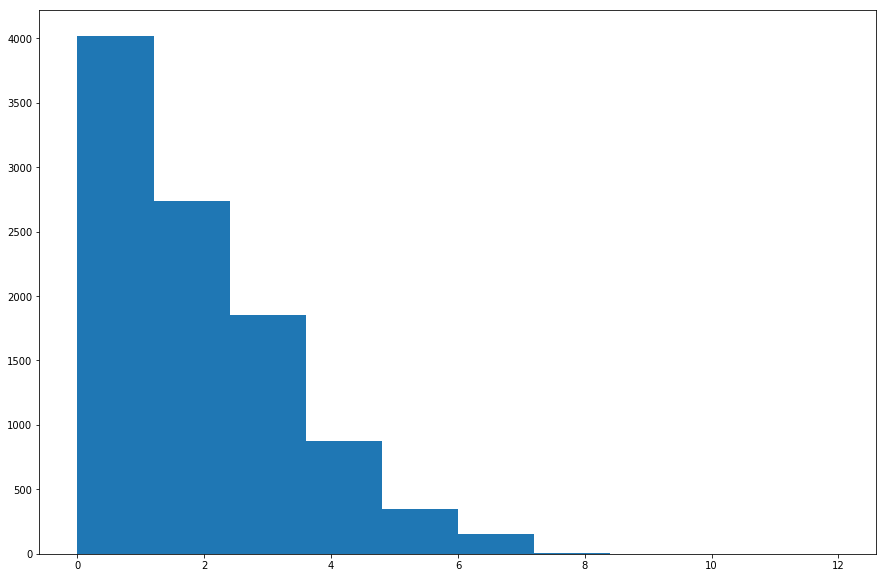

In [5]:
plt.hist(poisson_samp)

In [6]:
def gen_expon(b):
    u = unif()
    return -ln(1-u)*b

In [7]:
def gen_gamma(a, b):
    u = unif() 
    # Generate n=a Expon(b) random variables and sum them up
    expon_sample = [gen_expon(b) for i in range(a)]
    return sum(expon_sample)  

In [11]:
gamma_sample = [gen_gamma(5,0.5) for i in range(1000)]

In [12]:
# gamma.rvs does not take in a scale parameter, have to multiply
true_gamma_sample = [0.5*gamma.rvs(5) for i in range(1000)]

/Users/cfizette/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/cfizette/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


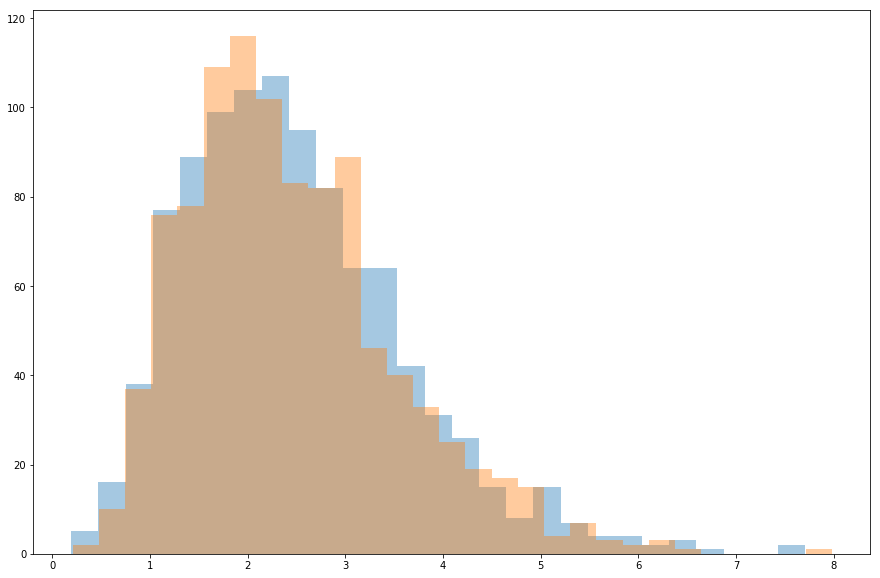

In [13]:
sns.distplot(gamma_sample, kde=False)
sns.distplot(true_gamma_sample, kde=False)